# Adiabatic passage

In [1]:
#import sys
#!{sys.executable} -m pip install qutip

First, we are going to import the libraries and define the differential equations:

In [2]:
#Import libraries
import matplotlib.pyplot as plt 
import numpy as np
from qutip import *
from numpy import loadtxt
from matplotlib.font_manager import FontProperties
from pylab import figure, savefig

In [3]:
def optical_bloch(sigma, t, p):
    """
    Defines the differential equations for the optical Bloch equations including detuning and damping.

    Arguments:
        sigma :  vector of the state variables:
                  sigma = [sigmax, sigmay,sigmaz]
        t :  time
        p :  vector of the parameters:
                  p = [om, alpha, rel,dec]
                    := [omega,relaxation,decoherence]
    """
    sigmax, sigmay,sigmaz = sigma
    [om,alpha,rel,dec] = p
    
    #print(alpha*t*sigmay)
    stoptime = 1500.0

    # Create f = (sigmax', sigmay',sigmaz'):
    f = [alpha*(stoptime/2-t)*sigmay-dec*sigmax,
         -1*alpha*(stoptime/2-t)*sigmax-om*sigmaz-dec*sigmay,
        om*sigmay-rel*(sigmaz+1)]
    return f

## Case 1: Adiabatic passage without relaxation and decoherence: $ \alpha / \Omega^2 = 0.02 $

In [4]:
# Use ODEINT to solve the differential equations defined by the optical Bloch equations
from scipy.integrate import odeint

# Parameter values
# Rabi frequency:
om1=1
# Transverse decay rate
dec1 = 0
# Longitudinal decay rate
rel1=0

# Initial conditions
sigmax1=0
sigmay1=0
sigmaz1=-1

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-7
stoptime = 1500.0
numpoints = 50000

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Linear detuning
alpha1=0.02
# Pack up the parameters and initial conditions:
p = [om1,alpha1, rel1,dec1]
sigma0 = [sigmax1, sigmay1,sigmaz1]



# Call the ODE solver.
bloch_sol = odeint(optical_bloch, sigma0, t, args=(p,), atol=abserr, rtol=relerr)

with open('adiabatic_passage_1.dat', 'w') as f:
    # Print & save the solution.
    for t1, sigma1 in zip(t, bloch_sol):
        print(t1, sigma1[0], sigma1[1], sigma1[2],file=f);

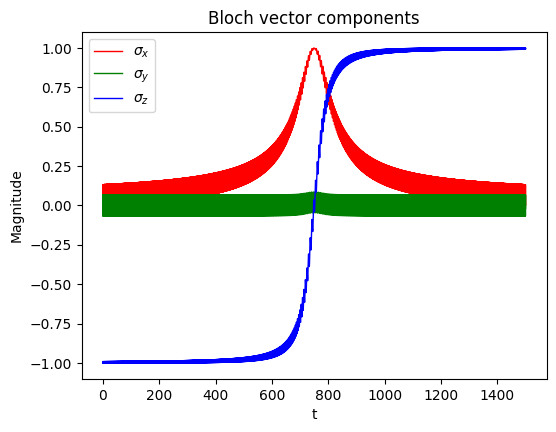

<Figure size 640x480 with 0 Axes>

In [5]:
# Plot the solution that was generated
t, sigmax, sigmay,sigmaz = loadtxt('adiabatic_passage_1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

# Plotting the curves simultaneously 
lw = 1
plt.plot(t, sigmax, color='r', label=r'$\sigma_x$', linewidth=lw) 
plt.plot(t, sigmay, color='g', label=r'$\sigma_y$', linewidth=lw) 
plt.plot(t, sigmaz, color='b', label=r'$\sigma_z$', linewidth=lw) 

# Naming the x-axis, y-axis and the whole graph 
plt.xlabel("t") 
plt.ylabel("Magnitude") 
plt.title("Bloch vector components") 


# Adding legend, which helps us recognize the curve according to it's color 
plt.legend() 
  
# To load the display window 
plt.show()

plt.savefig('adiabatic_passage_1_components.png', dpi=100)

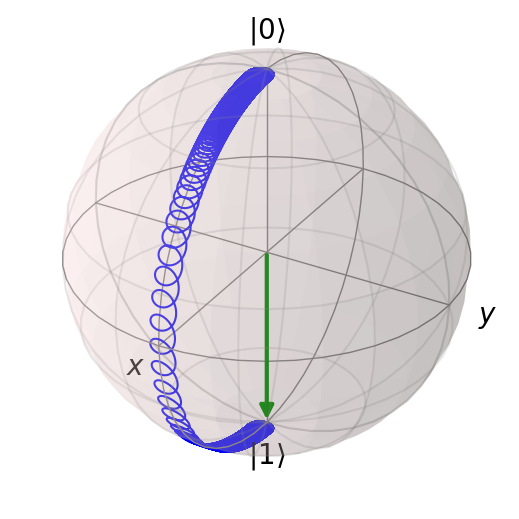

In [6]:
b = Bloch()
b.make_sphere()
#We are going to add the vector that represents the initial state and the points that correspond to the evolution
vec=[0,0,-1]
b.add_vectors(vec) #Initial state
pnts = [sigmax, sigmay,sigmaz]
b.add_points(pnts,meth='l')
b.render()
b.show()

## Case 5: Adiabatic passage with relaxation and decoherence: $ \alpha / \Omega^2 = 0.02 $, $ \gamma / \Omega = 0.001 $, $ \Gamma / \Omega = 0.002 $

In [13]:
# Use ODEINT to solve the differential equations defined by the optical Bloch equations
from scipy.integrate import odeint

# Parameter values
# Rabi frequency:
om5=1
# Transverse decay rate
dec5 = 0.1
# Longitudinal decay rate
rel5=0.001

# Initial conditions
sigmax5=0
sigmay5=0
sigmaz5=-1

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-7
stoptime = 1500.0
numpoints = 50000

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Linear detuning
alpha5=0.02
# Pack up the parameters and initial conditions:
p5 = [om5,alpha5, rel5,dec5]
sigma05 = [sigmax5, sigmay5,sigmaz5]



# Call the ODE solver.
bloch_sol5 = odeint(optical_bloch, sigma05, t, args=(p5,),
              atol=abserr, rtol=relerr)

with open('adiabatic_passage_5.dat', 'w') as f5:
    # Print & save the solution.
    for t1, sigma5 in zip(t, bloch_sol5):
        print(t1, sigma5[0], sigma5[1], sigma5[2],file=f5);

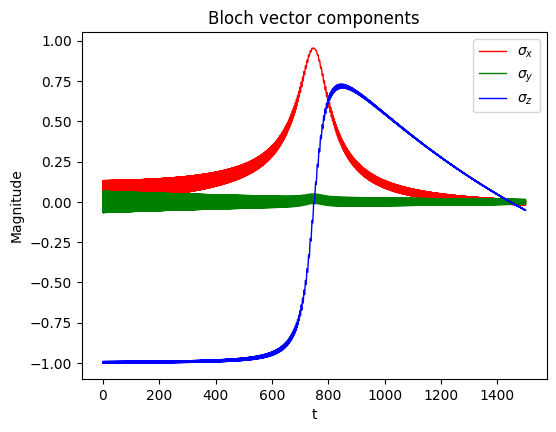

<Figure size 640x480 with 0 Axes>

In [14]:
# Plot the solution that was generated
t, sigmax, sigmay,sigmaz = loadtxt('adiabatic_passage_5.dat', unpack=True)

figure(1, figsize=(6, 4.5))

# Plotting the curves simultaneously 
lw = 1
plt.plot(t, sigmax, color='r', label=r'$\sigma_x$', linewidth=lw) 
plt.plot(t, sigmay, color='g', label=r'$\sigma_y$', linewidth=lw) 
plt.plot(t, sigmaz, color='b', label=r'$\sigma_z$', linewidth=lw) 

# Naming the x-axis, y-axis and the whole graph 
plt.xlabel("t") 
plt.ylabel("Magnitude") 
plt.title("Bloch vector components") 


# Adding legend, which helps us recognize the curve according to it's color 
plt.legend() 
  
# To load the display window 
plt.show()

plt.savefig('adiabatic_passage_5_components.png', dpi=100)

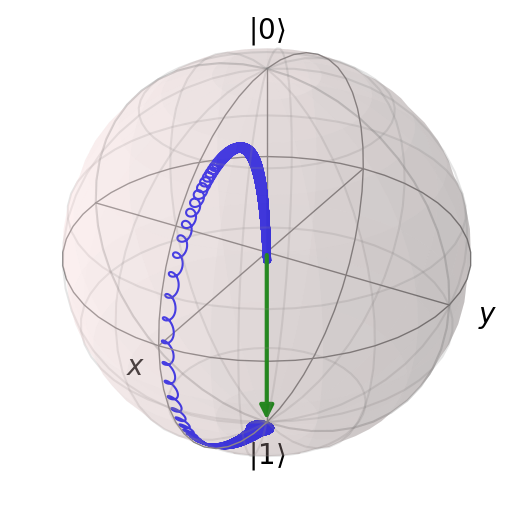

In [15]:
b5 = Bloch()
b5.make_sphere()
#We are going to add the vector that represents the initial state and the points that correspond to the evolution
vec=[0,0,-1]
b5.add_vectors(vec) #Initial state
pnts = [sigmax, sigmay,sigmaz]
b5.add_points(pnts,meth='l')
b5.render()
b5.show()